In [4]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print("Python : {}".format(sys.version))
print("numpy : {}".format(numpy.__version__))
print("pandas : {}".format(pandas.__version__))
print("matplotlib : {}".format(matplotlib.__version__))
print("seaborn : {}".format(seaborn.__version__))
print("scipy : {}".format(scipy.__version__))
print("sklearn : {}".format(sklearn.__version__))

Python : 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy : 1.16.2
pandas : 0.24.2
matplotlib : 3.0.3
seaborn : 0.9.0
scipy : 1.2.1
sklearn : 0.20.3


In [21]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Lets Load the dataSet(CSV file) using pandas
data = pd.read_csv('creditcard.csv')

In [7]:
# Explore the dataSet
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Get total data in the dataSet (value,columns)
print(data.shape)

(284807, 31)


In [9]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
data = data.sample(frac = 0.1, random_state = 1)

print(data.shape)

(2848, 31)


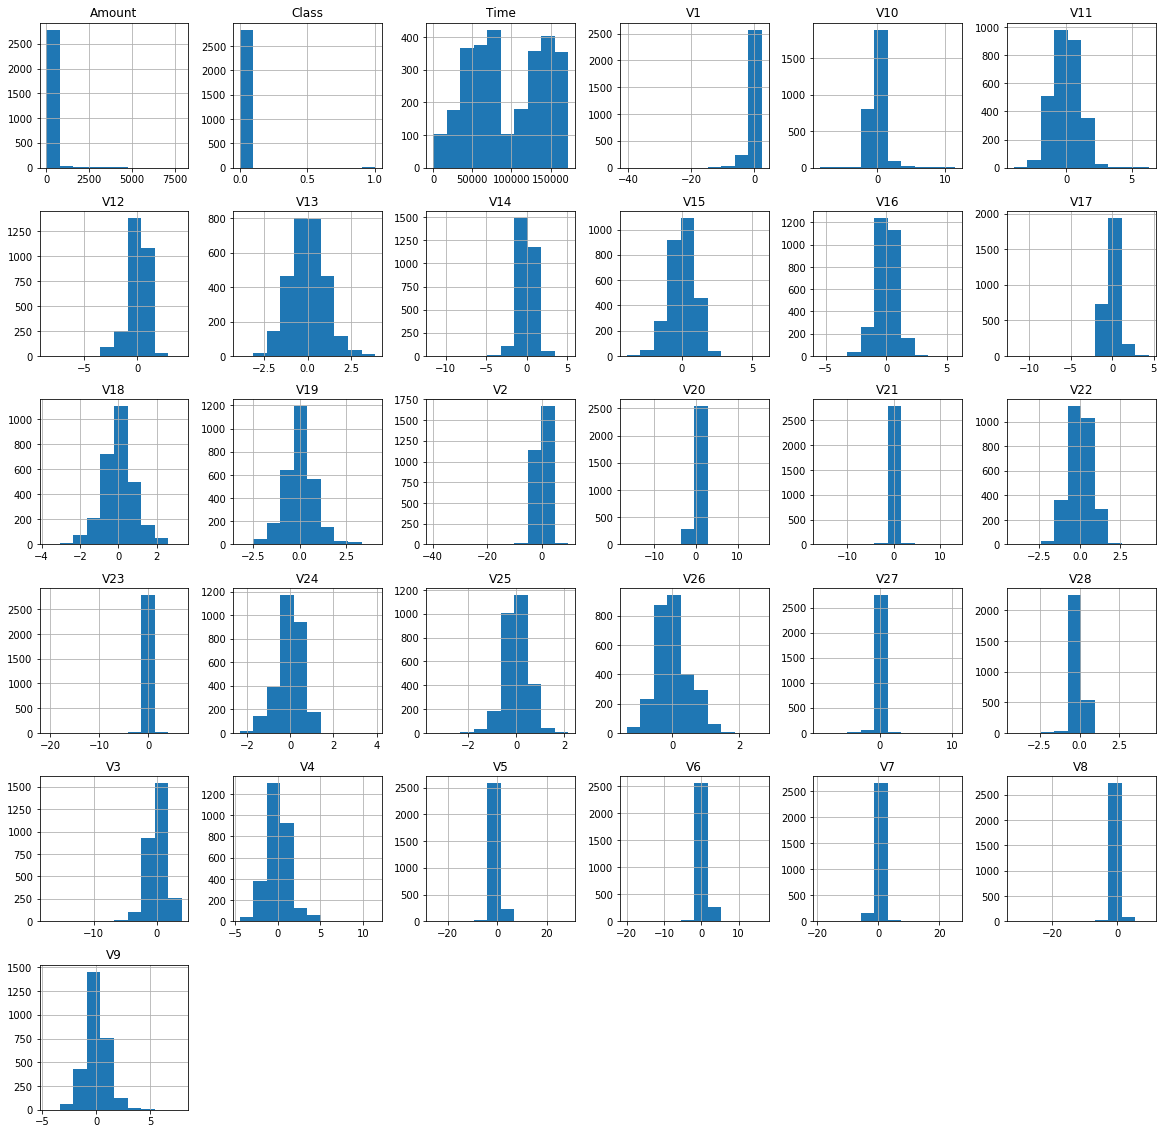

In [12]:
# Plot Histogram of each parameter(Visually)
data.hist(figsize = (20,20))
plt.show()

In [19]:
# Determine Number of frauds case in the dataSet(class = 0)
Fraud = data[data["Class"] == 1]
Valid = data[data["Class"] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))


print(outlier_fraction)
print("Fraud Case : {}".format(len(Fraud)))
print("Valid Case : {}".format(len(Valid)))

0.0017587055926837848
Fraud Case : 5
Valid Case : 2843


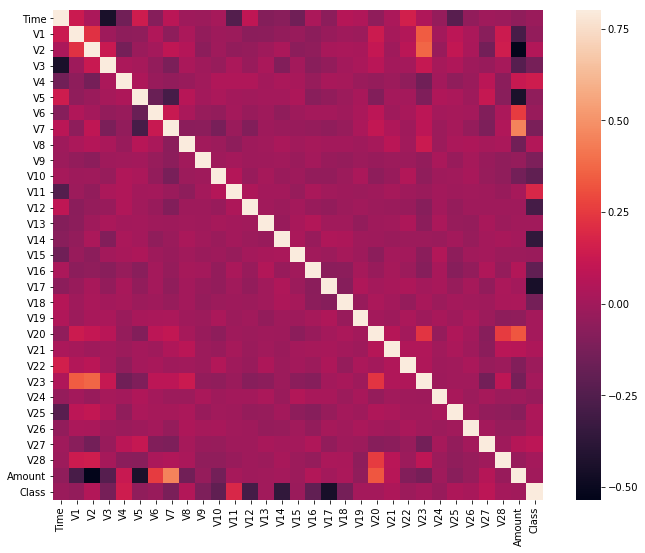

In [22]:
# Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8 , square = True)
plt.show()

In [23]:
# Get all the columns from the DataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we will be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(2848, 30)
(2848,)


In [24]:
# import from sklearn and implementing using TWO different Alogorith
from sklearn.metrics import classification_report , accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    "Islation Forest" : IsolationForest(max_samples=len(X),
                                       contamination = outlier_fraction,
                                        random_state = state),
    "Local Outlier Factor" : LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)
    
}

In [ ]:
# Fit the model
n_outliers = len(Fraud)

for i, (clf_name, cif) in enumerate(classifiers.items()):
    
    # Fit the data and tag outliers
    if cif_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outliers_factor_
    else:
            clf.fit(X)
            scores_pred = clf.decision_function(X)
            y_pred = clf.predict(X)
            
            # Reshape the predicting values to 0 for Valid , 1 for fraud
            y_pred[y_pred == 1] = 0
            y_pred[y_pred == -1] = 1
            
            n_errors = (y_pred != Y).sum()
            
            # Run classification metrics
            print("{}: {}".format(clf_name, n_errors))
            print(accuracy_score(Y,y_pred))
            print(classification_report(Y,y_pred))
                                        